In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data_src = "solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src)

In [ ]:
num_lags = 30
for i in range(1, num_lags + 1):
    data_df[f'GHI_T_{i}'] = data_df['GHI'].shift(i)

In [ ]:
data_df

,datetime,local_datetime,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,...,GHI_T_21,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30
0,2018-01-01 16:30:00,2018-01-01 09:30:00,2018,1,1,16,30,-1.2,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 16:40:00,2018-01-01 09:40:00,2018,1,1,16,40,-0.8,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 16:50:00,2018-01-01 09:50:00,2018,1,1,16,50,-0.3,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 17:00:00,2018-01-01 10:00:00,2018,1,1,17,0,0.1,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 17:10:00,2018-01-01 10:10:00,2018,1,1,17,10,0.5,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,2023-12-31 22:00:00,2023-12-31 15:00:00,2023,12,31,22,0,3.1,1.15,0.029,...,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0
135552,2023-12-31 22:10:00,2023-12-31 15:10:00,2023,12,31,22,10,2.8,1.15,0.029,...,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0
135553,2023-12-31 22:20:00,2023-12-31 15:20:00,2023,12,31,22,20,2.5,1.15,0.029,...,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0
135554,2023-12-31 22:30:00,2023-12-31 15:30:00,2023,12,31,22,30,2.2,1.15,0.029,...,377.0,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0


In [ ]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-1)
data.dropna(inplace = True)

In [ ]:
data

,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,Asymmetry,Clearsky DHI,...,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30,Target
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,2018,1,1,21,30,2.4,1.18,0.021,0.62,46,...,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,142.0,160.0
2018-01-01 14:40:00,2018,1,1,21,40,2.0,1.17,0.022,0.62,45,...,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,145.0
2018-01-01 14:50:00,2018,1,1,21,50,1.6,1.17,0.022,0.62,44,...,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,34.0
2018-01-02 07:40:00,2018,1,2,14,40,-7.3,1.17,0.016,0.62,15,...,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,57.0
2018-01-02 07:50:00,2018,1,2,14,50,-6.7,1.17,0.016,0.62,20,...,378.0,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:50:00,2023,12,31,21,50,3.4,1.15,0.029,0.62,46,...,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0,246.0,203.0
2023-12-31 15:00:00,2023,12,31,22,0,3.1,1.15,0.029,0.62,44,...,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0,183.0
2023-12-31 15:10:00,2023,12,31,22,10,2.8,1.15,0.029,0.62,42,...,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,153.0


In [ ]:
corr_matrix = data.corr()
target_corr = corr_matrix['Target'].sort_values(ascending = False)
print(target_corr)

Target                1.000000
GHI                   0.963311
GHI_T_1               0.932436
GHI_T_2               0.899830
GHI_T_3               0.864579
GHI_T_4               0.825928
GHI_T_5               0.783942
Clearsky GHI          0.774710
GHI_T_6               0.738894
GHI_T_7               0.691123
GHI_T_8               0.640631
DNI                   0.630873
Clearsky DNI          0.617423
GHI_T_9               0.588114
GHI_T_10              0.534104
Kcs                   0.484979
GHI_T_11              0.479078
Temperature           0.444794
GHI_T_12              0.422031
Clearsky DHI          0.378965
GHI_T_13              0.364711
GHI_T_14              0.306815
Hour                  0.254632
GHI_T_15              0.249461
GHI_T_16              0.192296
DHI                   0.184400
GHI_T_17              0.136041
Pressure              0.109390
GHI_T_18              0.081363
Alpha                 0.063535
Wind Speed            0.056888
Precipitable Water    0.056156
Dew Poin

In [ ]:
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
print(selected_features)

['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'GHI_T_4', 'GHI_T_5', 'Clearsky GHI', 'GHI_T_6', 'GHI_T_7', 'GHI_T_8', 'DNI', 'Clearsky DNI', 'GHI_T_9', 'GHI_T_10', 'Kcs', 'GHI_T_11', 'Temperature', 'GHI_T_12', 'Clearsky DHI', 'GHI_T_13', 'GHI_T_14', 'GHI_T_28', 'GHI_T_29', 'GHI_T_30', 'Relative Humidity', 'Solar Zenith Angle']


In [ ]:
data = data[selected_features]
print(data.columns)

Index(['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'GHI_T_4', 'GHI_T_5',
       'Clearsky GHI', 'GHI_T_6', 'GHI_T_7', 'GHI_T_8', 'DNI', 'Clearsky DNI',
       'GHI_T_9', 'GHI_T_10', 'Kcs', 'GHI_T_11', 'Temperature', 'GHI_T_12',
       'Clearsky DHI', 'GHI_T_13', 'GHI_T_14', 'GHI_T_28', 'GHI_T_29',
       'GHI_T_30', 'Relative Humidity', 'Solar Zenith Angle'],
      dtype='object')


In [ ]:
data

,Target,GHI,GHI_T_1,GHI_T_2,GHI_T_3,GHI_T_4,GHI_T_5,Clearsky GHI,GHI_T_6,GHI_T_7,...,Temperature,GHI_T_12,Clearsky DHI,GHI_T_13,GHI_T_14,GHI_T_28,GHI_T_29,GHI_T_30,Relative Humidity,Solar Zenith Angle
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,160.0,152,179.0,192.0,292.0,327.0,342.0,328,359.0,451.0,...,2.4,395.0,46,502.0,504.0,204.0,189.0,142.0,34.01,71.33
2018-01-01 14:40:00,145.0,160,152.0,179.0,192.0,292.0,327.0,305,342.0,359.0,...,2.0,493.0,45,395.0,502.0,226.0,204.0,189.0,41.97,72.47
2018-01-01 14:50:00,34.0,145,160.0,152.0,179.0,192.0,292.0,282,327.0,342.0,...,1.6,486.0,44,493.0,395.0,241.0,226.0,204.0,43.18,73.66
2018-01-02 07:40:00,57.0,34,145.0,160.0,152.0,179.0,192.0,34,292.0,327.0,...,-7.3,477.0,15,486.0,493.0,253.0,241.0,226.0,61.51,87.51
2018-01-02 07:50:00,83.0,57,34.0,145.0,160.0,152.0,179.0,57,192.0,292.0,...,-6.7,463.0,20,477.0,486.0,251.0,253.0,241.0,58.74,85.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:50:00,203.0,227,246.0,251.0,271.0,241.0,283.0,271,317.0,341.0,...,3.4,401.0,46,404.0,386.0,263.0,244.0,246.0,56.19,73.85
2023-12-31 15:00:00,183.0,203,227.0,246.0,251.0,271.0,241.0,247,283.0,317.0,...,3.1,395.0,44,401.0,404.0,280.0,263.0,244.0,57.39,75.10
2023-12-31 15:10:00,153.0,183,203.0,227.0,246.0,251.0,271.0,222,241.0,283.0,...,2.8,362.0,42,395.0,401.0,296.0,280.0,263.0,58.62,76.39


In [ ]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1).to_numpy()

In [ ]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108420, 26) (108420, 1) (27105, 26) (27105, 1)


In [ ]:
properties = None

In [ ]:
from sklearn.linear_model import LinearRegression

benchmark_model = LinearRegression()

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.1169 seconds
Score on Training data : 93.3745%
Score on Testing data : 93.1421%
RMSE : 70.2725
nRMSE: 0.1704
MAE: 39.8447


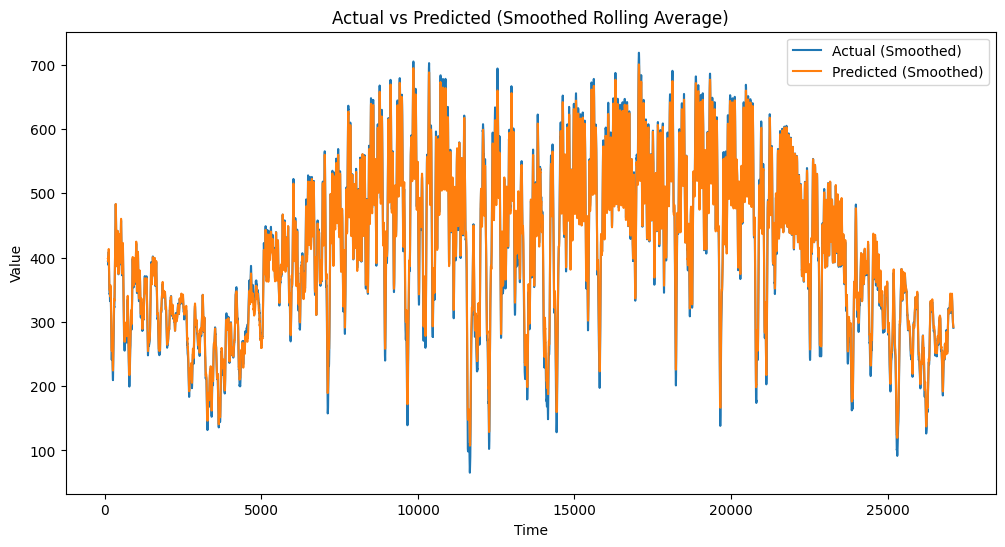

In [ ]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

benchmark_model = Ridge(alpha = 0.8)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Ridge Regression",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.0430 seconds
Score on Training data : 93.3745%
Score on Testing data : 93.1422%
RMSE : 70.2718
nRMSE: 0.1704
MAE: 39.8500


In [ ]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),70.2725,0.1704,39.8447,93.3745,93.1421,0.116908
Ridge Regression,70.2718,0.1704,39.85,93.3745,93.1422,0.042998


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

benchmark_model = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean", weights = "uniform")
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "KNeighbours Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

KNeighborsRegressor(metric='euclidean')
Regressor fitted in 0.0083 seconds
Score on Training data : 95.2549%
Score on Testing data : 91.9757%
RMSE : 76.0138
nRMSE: 0.1843
MAE: 43.1729


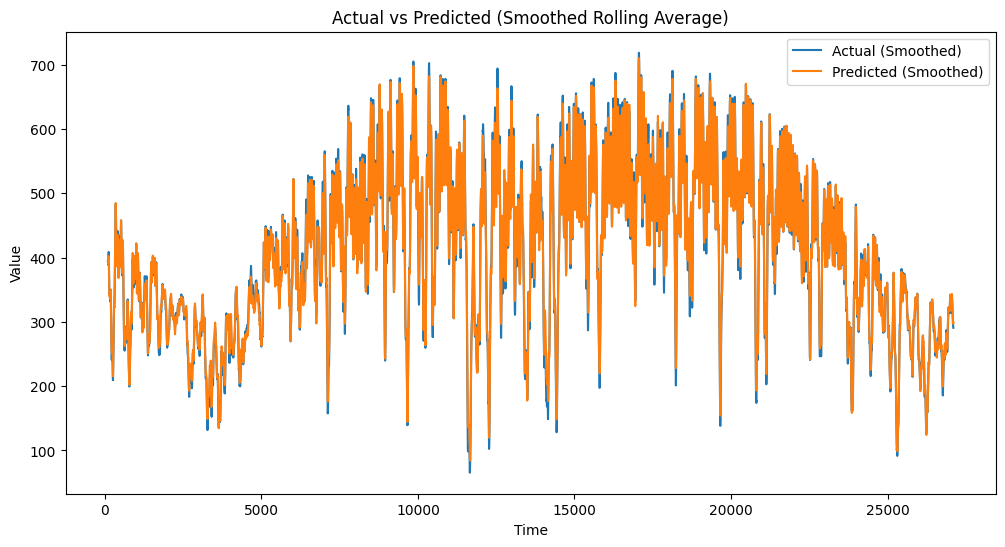

In [ ]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

benchmark_model = RandomForestRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "RandomForest Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=125)
Regressor fitted in 451.53 seconds
Score on Training data : 97.80%
Score on Testing data : 93.61%
Regressor fitted in 451.5254 seconds
Score on Training data : 97.7999%
Score on Testing data : 93.6067%
RMSE : 67.8501
nRMSE: 0.1645
MAE: 34.6705


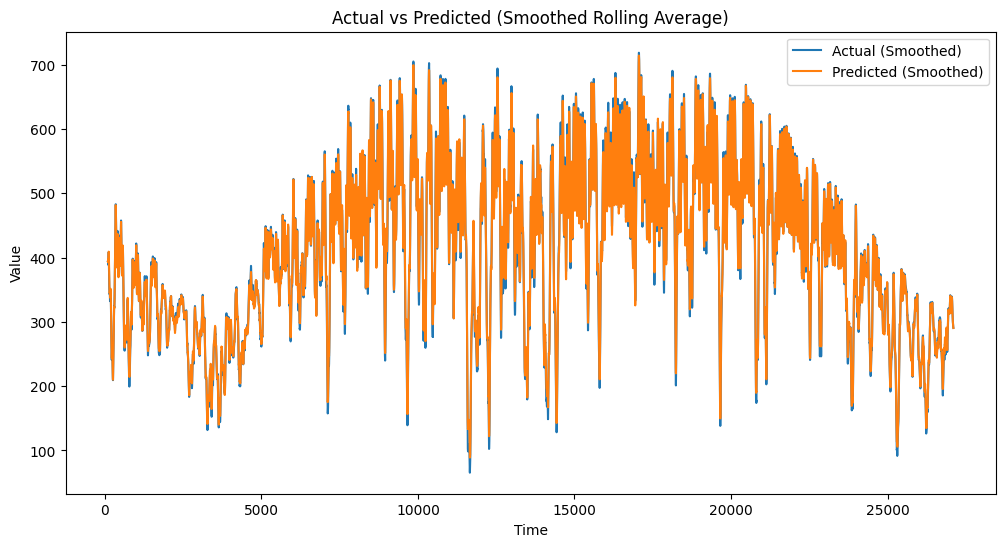

In [ ]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

benchmark_model = GradientBoostingRegressor(n_estimators = 125, max_depth = 5, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "GradientBoosting Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                          n_estimators=125)
Regressor fitted in 148.48 seconds
Score on Training data : 94.68%
Score on Testing data : 93.64%
Regressor fitted in 148.4804 seconds
Score on Training data : 94.6808%
Score on Testing data : 93.6425%
RMSE : 67.6602
nRMSE: 0.1640
MAE: 35.4609


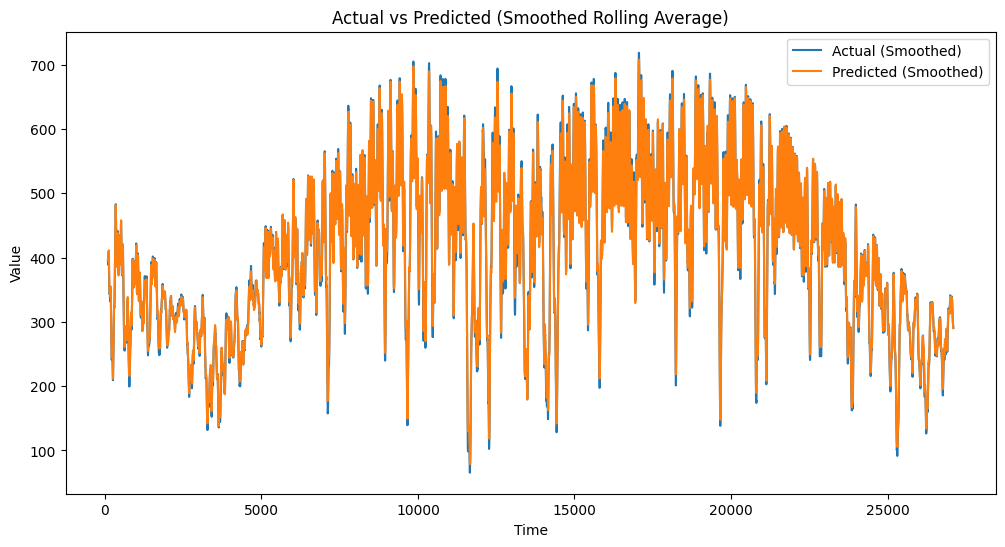

In [ ]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 72.44 seconds
Score on Training data : 98.18%
Score on Testing data : 93.67%
Regressor fitted in 72.4357 seconds
Score on Training data : 98.1823%
Score on Testing data : 93.6702%
RMSE : 67.5125
nRMSE: 0.1637
MAE: 34.2679


In [ ]:
from sklearn.neural_network import MLPRegressor

benchmark_model = MLPRegressor(batch_size = 256, solver = "adam", activation = "relu", max_iter = 300, learning_rate_init = 0.005)
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "MLP Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

MLPRegressor(batch_size=256, learning_rate_init=0.005, max_iter=300)
Regressor fitted in 10.04 seconds
Score on Training data : 93.88%
Score on Testing data : 93.54%
Regressor fitted in 10.0407 seconds
Score on Training data : 93.8842%
Score on Testing data : 93.5364%
RMSE : 68.2223
nRMSE: 0.1654
MAE: 39.4120


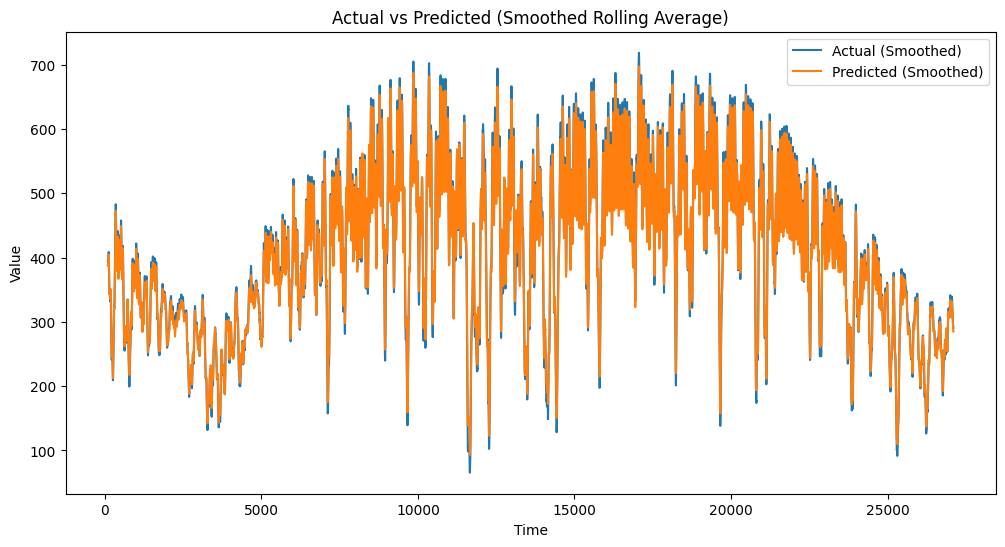

In [ ]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [ ]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),70.2725,0.1704,39.8447,93.3745,93.1421,0.116908
Ridge Regression,70.2718,0.1704,39.85,93.3745,93.1422,0.042998
KNeighbours Regressor,76.0138,0.1843,43.1729,95.2549,91.9757,0.008325
RandomForest Regressor,67.8501,0.1645,34.6705,97.7999,93.6067,451.525379
GradientBoosting Regressor,67.6602,0.164,35.4609,94.6808,93.6425,148.480379
ExtraTrees Regressor,67.5125,0.1637,34.2679,98.1823,93.6702,72.435734
MLP Regressor,68.2223,0.1654,39.412,93.8842,93.5364,10.040699


In [ ]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor,67.5125,0.1637,34.2679,98.1823,93.6702,72.435734
GradientBoosting Regressor,67.6602,0.164,35.4609,94.6808,93.6425,148.480379
RandomForest Regressor,67.8501,0.1645,34.6705,97.7999,93.6067,451.525379
MLP Regressor,68.2223,0.1654,39.412,93.8842,93.5364,10.040699
Linear Regression (Benchmark),70.2725,0.1704,39.8447,93.3745,93.1421,0.116908
Ridge Regression,70.2718,0.1704,39.85,93.3745,93.1422,0.042998
KNeighbours Regressor,76.0138,0.1843,43.1729,95.2549,91.9757,0.008325


# Performance Of Models

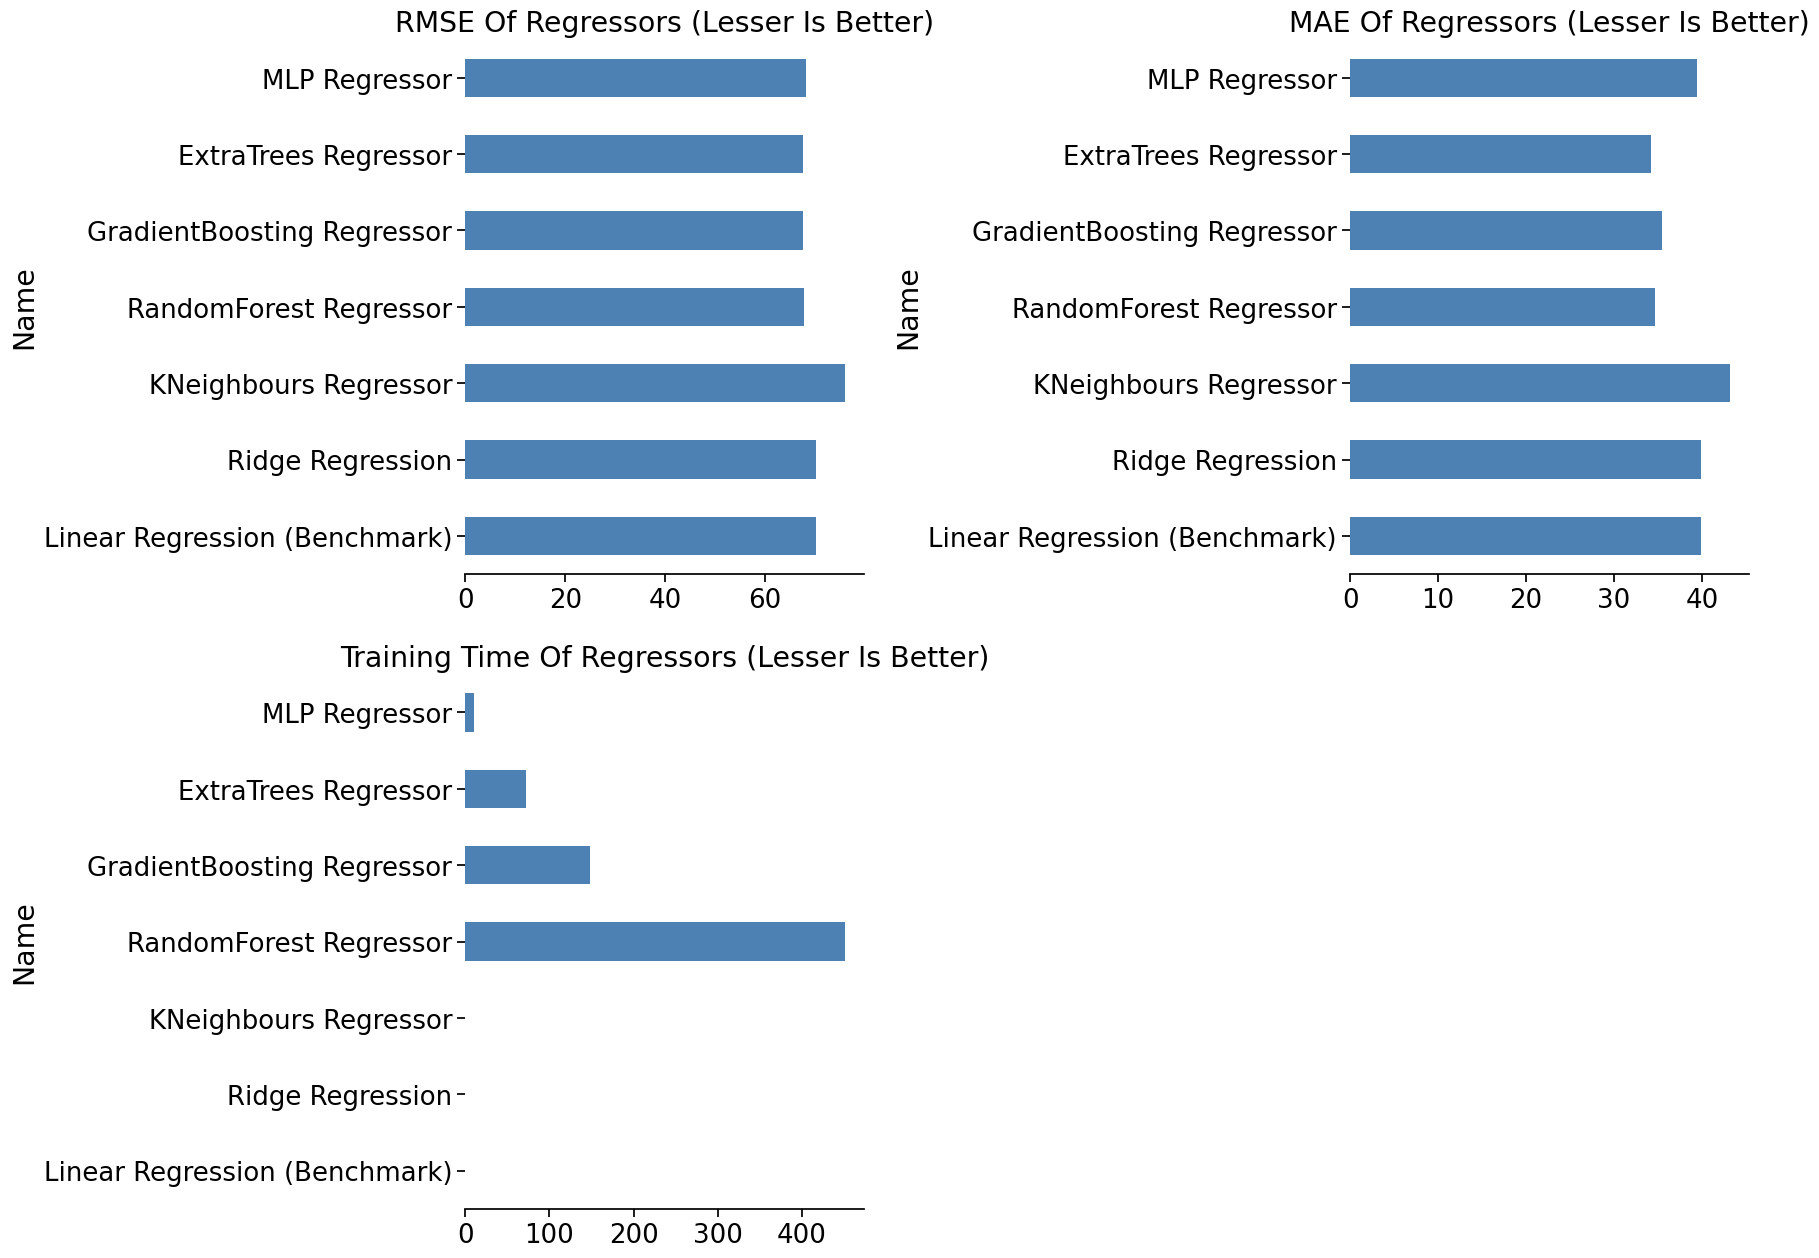

In [ ]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.title("RMSE Of Regressors (Lesser Is Better)")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.title("MAE Of Regressors (Lesser Is Better)")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Training Time Of Regressors (Lesser Is Better)")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

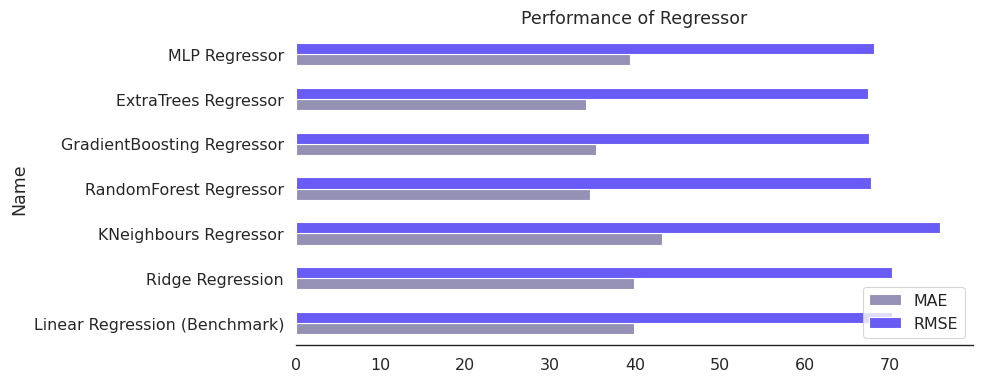

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout()

plt.show()

#Optimizing Best Peforming Model

In [ ]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-1)
data.dropna(inplace = True)

In [ ]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1)
featuresTrain = X.columns
X = X.to_numpy()

In [ ]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108420, 56) (108420, 1) (27105, 56) (27105, 1)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Train model
etr = ExtraTreesRegressor()
Y_train_scaled = Y_train_scaled.ravel()
etr.fit(X_train_scaled, Y_train_scaled)

# Get feature importance
importances = etr.feature_importances_

# Sort and plot
feat_imp = pd.Series(importances, index=featuresTrain).sort_values(ascending=False)
top_features = feat_imp[feat_imp > 0.01].index
print(top_features)

Index(['GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'Clearsky GHI', 'GHI_T_4',
       'Solar Zenith Angle'],
      dtype='object')


In [ ]:
X = data[list(top_features)].to_numpy()
X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108420, 7) (108420, 1) (27105, 7) (27105, 1)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor (With Feature Selection)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": end - round(start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 21.4425 seconds
Score on Training data : 96.9540%
Score on Testing data : 93.4904%
RMSE : 68.4646
nRMSE: 0.1660
MAE: 34.9413


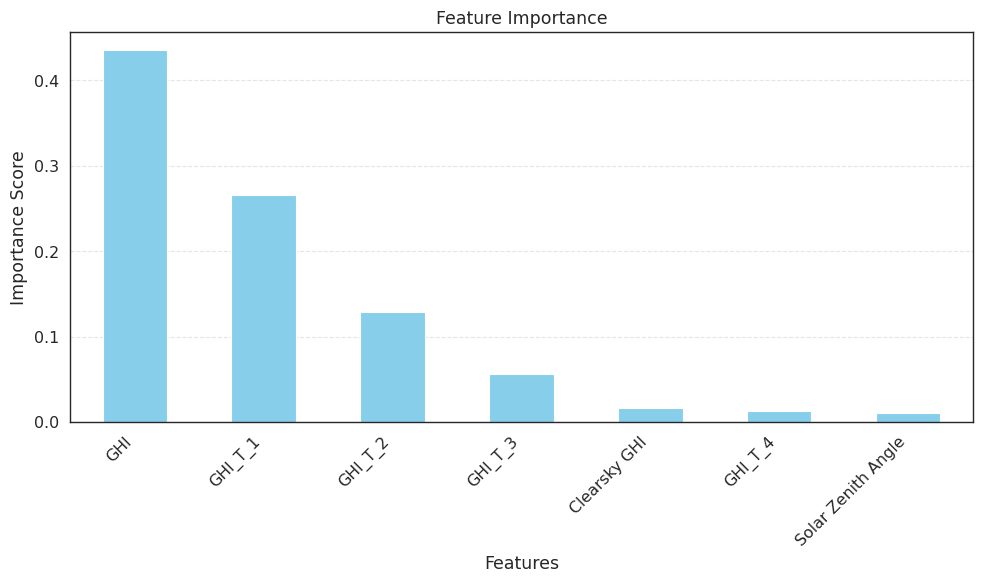

In [ ]:
plt.figure(figsize=(10, 6))
feat_imp = feat_imp[feat_imp > 0.01]
feat_imp.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor,67.5125,0.1637,34.2679,98.1823,93.6702,72.435734
GradientBoosting Regressor,67.6602,0.164,35.4609,94.6808,93.6425,148.480379
RandomForest Regressor,67.8501,0.1645,34.6705,97.7999,93.6067,451.525379
MLP Regressor,68.2223,0.1654,39.412,93.8842,93.5364,10.040699
ExtraTrees Regressor (With Feature Selection),68.4646,0.166,34.9413,96.954,93.4904,21.442466
Linear Regression (Benchmark),70.2725,0.1704,39.8447,93.3745,93.1421,0.116908
Ridge Regression,70.2718,0.1704,39.85,93.3745,93.1422,0.042998
KNeighbours Regressor,76.0138,0.1843,43.1729,95.2549,91.9757,0.008325


In [ ]:
properties.to_csv("10_Minutes_Ahead.csv", index = False)